<a href="https://colab.research.google.com/github/SaW2017/ClearingDesire_AI_ML/blob/master/Yolo3try31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

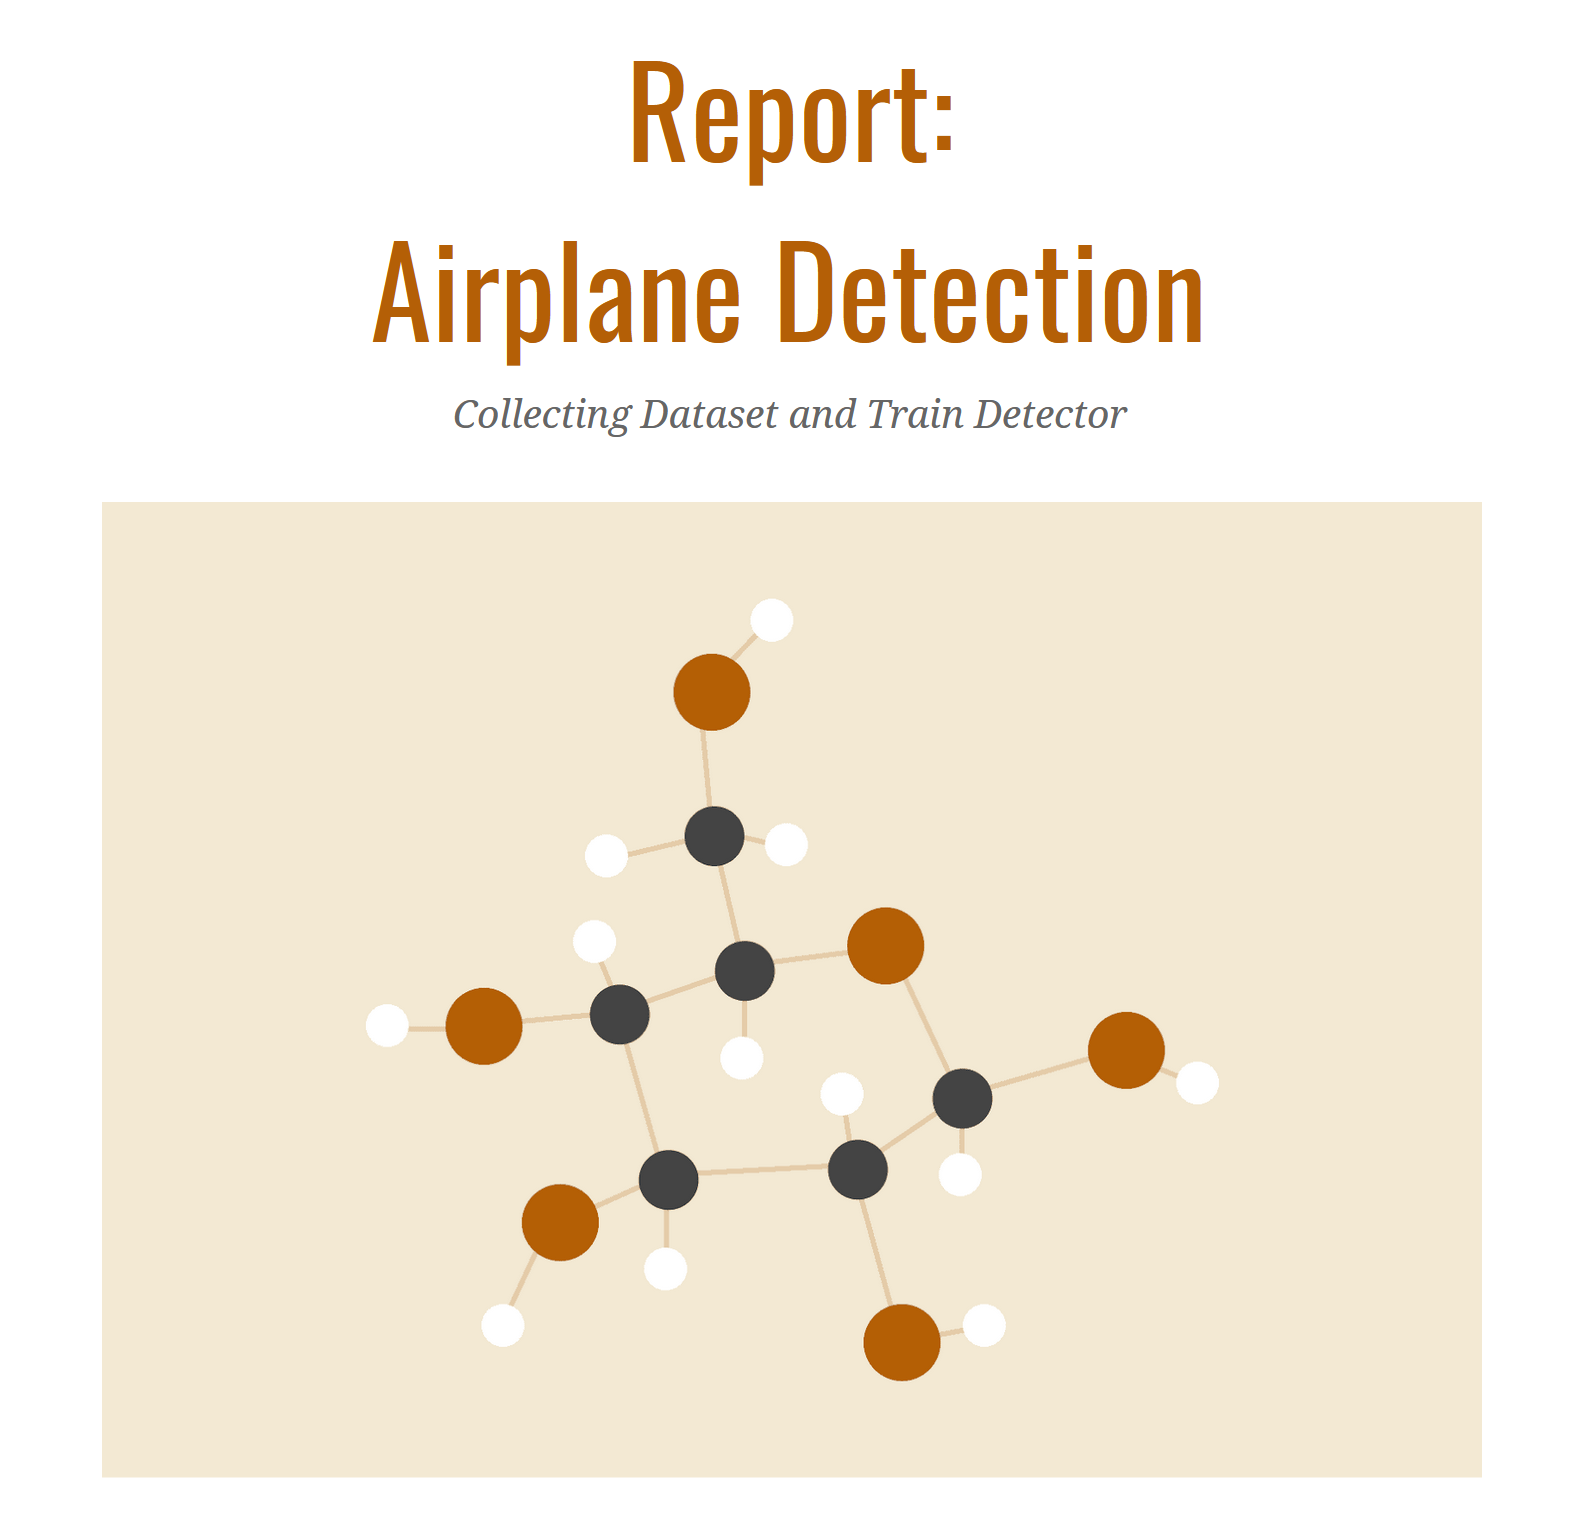

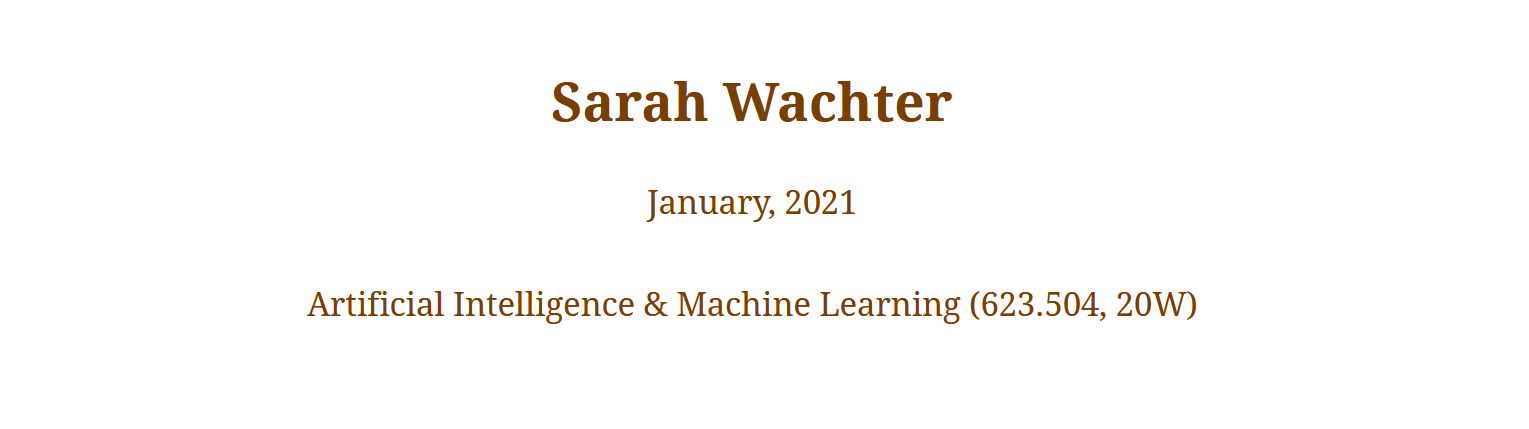


# Part Two: Setup YOLO and Darknet in Google-Colaboratory

## Why Google Colab?

<p align="justify">
After some research I decided to Setup YOLO and Darknet in Google-Colab, because it allows to write and execute python code through the browser. According to 
<a href="https://colab.research.google.com/notebooks/intro.ipynb#">Google</a>
it is especially well suited to machine learning and data analysis. With Google Colab the use is free up to 12 hours at a time and the code is executed on Google`s cloud servers, this means one can use the power of Google hardware, including GPUs and TPUs. The limitation with 12 hours is a handicap, because after that the runtime-environment get destroyed and with it every variable and data which was generated. This is the reason why I connect the VM to my Google-Drive to keep some important data. Before starting the Notebook don`t forget to set the Runtime-Environment to GPU.
</p>

# Download and install needed Libraries, Packages and Dependencies

<p align="justify">
Further Packages are needed: 

*   CUDA - https://developer.nvidia.com/cuda-zone 
*   cuDNN - https://developer.nvidia.com/cudnn 
*   git - https://git-scm.com/
*   libopencv-dev (openCV) - https://opencv.org/ 
*   Darknet - https://github.com/AlexeyAB/darknet/
*   vim - https://opensource.com/article/19/3/getting-started-vim 
*   GNU Compiler Collections - GNU Compiler Collections - https://gcc.gnu.org/  
*   tensorflow - https://www.tensorflow.org/ 
*   os - https://docs.python.org/3/library/os.html 
*   pre-trained darknet-weights - http://pjreddie.com/media/files/darknet53.conv.74
*   darknet scripts for plotting 

<br/>

Dependencies for openCV
*   cmake 
*   build-essential   
*   libavcodec-dev 
*   libavformat-dev 
*   libswscale-dev  
*   libgtk2.0-dev
*   pkg-config 
*   libavcodec-dev 
*   libavformat-dev 
*   libswscale-d 

##Next, the installed packages are briefly explained:
<a href="https://cmake.org/">CMake</a> is used to control the software compilation process. It uses simple platform and compiler independent configuration files, and generate native makefiles and workspaces that can be used in the compiler environment.
<br/>
CUDA is according to <a href="https://www.infoworld.com/article/3299703/what-is-cuda-parallel-programming-for-gpus.html">inforworld.com </a>
> a parallel computing platform and programming model developed by Nvidia for general computing on its own GPUs (graphics processing units). CUDA enables developers to speed up compute-intensive applications by harnessing the power of GPUs for the parallelizable part of the computation. 
<br/>

The  NVIDIA CUDA® Deep Neural Network library (cuDNN) supports high-performance GPU acceleration. It makes training neural networks more efficient and is perfectly suitable for the use in Google Colab.
<br/>

OpenCV (Open Source Computer Vision Library) and TensorFlow  are open source computer vision and machine learning software libraries with more than 2500 optimized algorithms and they can bes used to develop and train ML models.
<br/>

CUDA and OpenCV are optional dependecies for Darknet, which is explained in more detail below. OpenCV supports more image types and CUDA is needed for the GPU Computation. Using the GPU is way more efficient, because it is around 500 times faster than using the CPU. 
<br/>

NumPy is a package for scientific computing. It provides a multidimensional array object. As the homepage stated:

> NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.
<br/>

The OS module in Python provides functions for interacting with the operating system. In this case to get the path of images.
<br/>

For further information - please look at the comments in the code or later explanations.
</p>

#Start the Coding

<p align="justify">
A few of the following steps are commented, because they just have to be done at the first time. Because of the Runtime Environment going idle after 12 hours a lot of these steps had to be done a few times.
<p/>

In [1]:
# First check current CUDA version to know which cuDNN I have to download 
# !/usr/local/cuda/bin/nvcc --version

In [2]:
# I`m unzipping the cuDNN files from my Drive folder directly to the VM CUDA folders
# because next time I don`t have to download everything again
# !tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
# !chmod a+r /usr/local/cuda/include/cudnn.h

In [3]:
# test the version
#!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

# if this is not working does this to check if file is there
# !cat /usr/local/cuda/include/cudnn.h

<p align="justify">
Mount the Google Drive Space and create symbolic link.
</p>

In [4]:
# This cell imports the drive library and mounts my Google Drive as a VM local drive. I can access to my Drive files 
# using this path "/content/gdrive/MyDrive/"
# I need this because the files are there, which I net to set the environment up again
# and my backupdata like the yolo-weights will also be saved there

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
# Not Necessary cell
# List the content of my drive folder 
!ls '/content/gdrive/MyDrive/yolov3/'

 backup
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 darknet_scripts
 generate_train.py
 log.txt
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [6]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/yolov3/ is equal to /mydrive
# is way more convenient ;)
!ln -s /content/gdrive/My\ Drive/yolov3 /mydrive
!ls /mydrive 

 backup
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 darknet_scripts
 generate_train.py
 log.txt
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [7]:
# update everything to run in no further problems
!apt-get update
!apt-get upgrade

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:15 http://se

<p align="justify">
Set everything up for OpenCV.
</p>



In [8]:
# openCV has a lot of dependecies and after a long series of trial and error
# there's some things I need to install first
# install dependencies for openCV
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base gi

In [9]:
# more things which needs to be installed
!apt-get install libavcodec-dev libavformat-dev libswscale-d

# install cmake
# CMake is a cross-platform free and open-source software for build automation,
# testing and packaging using a compiler-independent method.
# CMake is not a build system but rather it's a build-system generator.
# It supports directory hierarchies and applications that depend on multiple libraries.
!apt-get -y install cmake
!which cmake

!cmake --version

# install OpenCV
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


# Darknet & YOLO v3 - Setting up & install CUDA

<p align="justify">
<a href="https://pjreddie.com/darknet/">Darknet</a> is an open Source Neural Network in C and CUDA. ALso it supports GPU computation, this is the reason why I chose it to work on Google Colab. Darknet is mainly for object detection. After some research I found out that Darknet in combination with YOLO as a specialized framework, there are better in accuracy and speed than other architectures. Furthermore these combination is very well documented and especially for me, who is working with this and Python for the first time, it is very helpful to find this much of information. 




</p>

# YOLO v3
<p align="justify">
Now I want to explain YOLO (You only look once) more in detail. It uses Convolutional Neural Networks for Object Detection.
<br/>
YOLO v3 can:

*   Detect multiple objects on one image
*   Predict classes of objects
*   Identify locations of objects on images

What YOLO does is to apply a single NN to the whole image. This Network divides the image into regions and produces probabilities for every region. After that YOLO predicts a number of Bounding  Boxes that cover some regions on the image and chooses the best ones according to the before produced probabilities.

</p>

## Architecture of YOLO version 3

<p align="justify">
YOLO v3 uses convolutional layers and it consists of 53 CNNs layers (also called: Darknet-53). But for detection tasks, like mine, the original architecture was stacked with 53 more layers. This makes in total 106 layers of architecture in YOLO version 3. The detection itself is made at three layers: 82,94 and 106. 
<br/>

![](https://miro.medium.com/max/1050/0*DvRGcggiSgGlekij.png)
[Source](https://towardsdatascience.com/digging-deep-into-yolo-v3-a-hands-on-guide-part-1-78681f2c7e29)

<br/>

As you can see in the figure above, this version incorporates essential elements like:
*   Residual Blocks
*   Skip Connections
*   Up-Sampling

Each convolutional layer is followed by a batch normalization layer and a Leaky ReLU activation function. There are no pooling layers, but instead, additional convolutional layers with stride 2, are used to down-sample feature maps. With the use of additional convolutional layers to down-sample feature maps it is possible to prevent loss of low-level features that a pooling layer would just exclude. As a result, capturing low-level features helped to improve ability for also detect small objects.
<br/> 

The networks input is a batch of images following the following structure: n, 416, 416, 3, where n is the number of an image. The 416's are the width and the height of the image, which can be changed to a higher number divisble by 32. By increasing the resolution of an input image, the models's accuracy might be improved after training. The two numbers are often called as input network size. It means that the input images can be of every size, they will be resized according to the input network size. The last number is the amount of channels, here three would be RGB. 
</p>


## Detection

<p align="justify">
As mentioned above the YOLO version 3 makes detections at three different scales and at three different places in the network. Detections will be made at layer 82, 94 and 106 and respectively the network downsamples the input images by the factors 32, 16, and 8. These three numbers are called stride of the network and they show how the output at these three seperate places is smaller than the input.
<br/>

*For example:*
 <br/>
*If the network input size would be 416x416 and we would consider a stride of 16 then the output size would be*
 <br/>

$\frac{416}{16} = {26}$
<br/>

*26x26. This size is  responsible for detecting medium size objects. If the stride is 32 and accordingly the output size 13x13, this is for detecting large objects, and stride 8 with output size 52x52, is therefor for detecting small objects.*
</p>

## Detection Kernels

<p align="justify">
To produce the output YOLO version 3 applies 1x1 detection kernels at the above mentioned layers 82, 94 and 106. This 1x1 convolutions are applied to the downsampled input images. Consequently the feature maps will have the same spatial dimensions:

*   (13 x 13)
*   (26 x 26)
*   (52 x 52)

![](https://miro.medium.com/max/1050/1*vPkSlucTm2tZtTd8ID8RAw.png)
[Source](https://towardsdatascience.com/digging-deep-into-yolo-v3-a-hands-on-guide-part-1-78681f2c7e29)

<br/>

The shape of the 1x1 detection kernel has also it's depth, which is calculated by following equation:

$(b * (5 + c))$

where b is the number of bounding boxes (BB), that each cell of the produced feature map can predict. YOLO v3 predicts three bounding boxes for every cell of these feature maps. 

This is why $b = 3$. Each BB has $5 + c$ attributes, which describes the following:

*   Centre coordinates of the bounding box
*   Width and height as the dimensions of the BB
*   Objectness score
*   List of confidence scores for every class the actual BB might belong to

The c is therefore for the number of classes. When the YOLO v3 is trained on the COCO-Dataset which supports 80 different classes, than c is 80. Then there would be the total number of attributes for each bounding box:

$ (3 * (5 + 80)) = 255 $.

Finally each featuremap produced by detection kernels at three seperate places in the network, has one more dimension depth that incorporates 255 attributes of bounding boxes for the COCO-dataset. The shapes of these feature maps would be like:

*   (13, 13, 255)
*   (26, 26, 255)
*   (52, 52, 255)

</p>

## Grid Cells

<p align="justify">

As stated above YOLO v3 predicts three bounding boxes (BB) for every cell of the feature map.
Each cell, in turn, predicts an object through one of it's BB if the centre of the object belongs to the receptive field of this cell. This is the task of YOLO version 3 while training:  
identify the cell that falls into the centre of the object. This cell has to be one of the feature map’s cell produced by detection kernels before. When YOLO version 3 is training, it has one ground truth bounding box that is responsible for detecting one object. That’s why and firstly, we need to define which cells this bounding box belongs to. 

![](https://lilianweng.github.io/lil-log/assets/images/yolo-responsible-predictor.png)
[Source](https://lilianweng.github.io/lil-log/2018/12/27/object-detection-part-4.html)

*For example:*
<br/>

*To define which cells this bounding box belongs to, the first detection scale  where we have 32 as stride of the Network should be considered. The input image of 416x416 is downsampled into 13x13 grid of cells. This grid now represents the produced output feature map. The centre cell is assigned by YOLO version 3 to be responsible for predicting the actual object, when all cells, which belongs to the ground truth bounding box, are identified. The objectness score for this would be equal to 1. So this cell would be one of the corresponding feature map’s cell that now is responsible for detecting an airplane. During the training of all cells, including this one, YOLO predicts 3 BB each. Which one should be assigned as the best predicted airplane's bounding box?*
<p/>

 
## Anchor Boxes

<p align="justify">
To predict bounding boxes, YOLO version 3 uses pre-defined default bounding boxes that are called anchors or priors. These anchors are used later to calculate the predicted bounding box’s real width and real height. In total, 9 anchor boxes are used. Three anchor boxes for each scale (82, 94, 106). This means that at each scale, every grid cell of the feature map can predict three BB by using three anchors. To calculate these anchors, k-means clustering is applied in YOLO version 3.

As mentioned above first there's the input for example (416, 416, 3). This image goes through YOLO v3 deep CNN architecture till the first layer, which is mentioned before. The picture is downsampled by stride 32 and detection kernels produce as output a feature map at scale (13, 13, 255). Since we have three anchor boxes, each cell encodes information about three predicted bounding boxes. Furthermore we need to extract probabilities among these three predicted bounding boxes of this cell to identify that this box contains a certain class. 
To do so following elementwise product of objectness score and list of confidence scores is computed. 
<br/>

$BB_{1}score =
P_{0} *
\begin{pmatrix}
 p_{1} \\
 p_{2} \\
 \vdots \\
 p_{c} \\
\end{pmatrix} =
\begin{pmatrix}
 0.06 \\
 0.08\\
 \vdots \\
 0.05 \\
\end{pmatrix}  
\xrightarrow[MAX] {} 0.58 \ \ for class: airplane
$

<br/>

$BB_{2}score =
P_{0} *
\begin{pmatrix}
 p_{1} \\
 p_{2} \\
 \vdots \\
 p_{c} \\
\end{pmatrix} =
\begin{pmatrix}
 0.09 \\
 0.05\\
 \vdots \\
 0.03 \\
\end{pmatrix}  
\xrightarrow[MAX] {} 0.32 \ \ for class: bird
$

<br/>

$BB_{3}score =
P_{0} *
\begin{pmatrix}
 p_{1} \\
 p_{2} \\
 \vdots \\
 p_{c} \\
\end{pmatrix} =
\begin{pmatrix}
 0.02 \\
 0.03\\
 \vdots \\
 0.05 \\
\end{pmatrix}  
\xrightarrow[MAX] {} 0.28 \ \ for class: cross
$

This product has to be compute over all three bounding boxes and the maximum probability has to be found. Therefore it can be said, that this box detected class airplane with probability 0.58.
These calculations are applied to all 13x13 cells across the three predicted boxes and across 80 classes (COCO-Dataset). The number of predicted boxes at this first scale in the Network is 507, computed as $13 * 13 * 3 = 507$. Moreover, these calculations are also applied to the other scales in the Network giving us 2028 (26x26) predicted boxes and 8112 (52x52) predicted boxes. This means in total, YOLO version 3 predicts 10 647 boxes that are filtered with non-maximum suppression technique. 
</p>

## Predicted Bounding Boxes

<p align="justify">
As explained before, anchors are bounding box’s priors and they were calculated by using K-means clustering. For COCO dataset this would be as follow:
<br/>
To predict real width and real height of the bounding boxes, YOLO v3 calculates offsets to predefined anchors.  
This offset is also called log-space transform. To predict centre coordinates of the bounding boxes, YOLO v3 passes outputs through sigmoid function. 

<figure>
<img src="https://www.researchgate.net/profile/Shinji_Kawakura/publication/342518641/figure/fig3/AS:916828033388545@1595600245356/Bounding-boxes-with-dimension-priors-and-location-prediction-24-We-predict-the-width.png" width="100%">
<figcaption align="center">
Bounding boxes with dimension priors and location prediction. We predict the width and height of the box as offsets from cluster centroids. We predict the center coordinates of the box relative to the location of filter application using a sigmoid function. <a href="https://arxiv.org/pdf/1612.08242.pdf">Source</a>
</figcaption>
</figure>

According to [Redmon and Farhadi (2016)](https://arxiv.org/pdf/1612.08242.pdf) following equations are used to obtain the predicted bounding box’s width, height and centre coordinates:

$b_{x} = \sigma (t_{x}) + c_{x} $
<br/>

$b_{y} = \sigma (t_{y}) + c_{y} $
<br/>

$b_{w} = p_{w} + e^{t_{w}} $
<br/>

$b_{h} = p_{h} + e^{t_{h}} $
<br/>

$b_{x}, b_{y}, b_{w}$ and $b_{h}$ are the centre coordinates, width and height of the predicted bounding box.
$t_{x}, t_{y}, t_{w}$ and $t_{h}$ are outputs of the NN after training.
$c_{x}$ and $c_{y}$ are the coordinates of the top left corner of the cell on the grid of the appropriate anchor box. Finally,$p_{w}$ and $p_{h}$ are the anchor’s boxes width and height.
YOLO version 3 doesn’t predict absolute values of width and height. Instead, it predicts offsets to anchors. This helps to eliminate unstable gradients during training. 
That’s why the values $c_{x}, c_{y}, p_{w}$ and $p_{h}$ are normalized to the real image width and real image height. 

*   $c_{x} = \frac{c_{x}}{width-of-image}$

*   $c_{y} = \frac{c_{y}}{height-of-image}$

*   $p_{w} = \frac{p_{w}}{width-of-image}$

*   $p_{h} = \frac{p_{h}}{height-of-image}$

And the centre coordinates $t_{x}, t_{y}$ are passed through sigmoid function, that gives values between $0$ and $1$.
Consequently, to get absolute values after predicting, they simply need to be multiplied by the real and whole image width and height. 

*   $BB_{x} = b_{x} * width-of-image$

*   $BB_{y} = b_{y} * height-of-image$

*   $BB_{w} = b_{w} * width-of-image$

*   $BB_{h} = b_{h} * height-of-image$


</p>

## Objectness Score

<p align="justify">
As explained before YOLO v3 creates for every cell an output with the three BB with their attributes.
These attributes were $t_{x}, t_{y}, t_{w}, t_{h}$ and $p_{0}$ (the confidence score) and confidence scales for every class this bounding box might belong to. In the COCO-Database this would be 80. These outputs are used later to choose anchor boxes by calculating scores and to calculate predicted bounding box’s real width and real height by using chosen anchors. 
<br/>
$p_{0}$ here is the so called objectness or confidence score. During training YOLO version 3 assigns a centre cell of the ground truth bounding box, which is responsible for predicting this object. Consequently, this cell and it's neighbours have an objectness score nearly 1, whereas corner cells have objectness score almost 0. In other words, objectness score represents the probability that this cell is a centre cell responsible for predicting one particular object and an appropriate bounding box which contains the object itself inside.
<br/> 
The difference between objectness/confidence score and the probabilities for class confidence scales is, that class confidence scales represent probabilities that a detected object belongs to a particular class like airplane, banana, bird etc. Whereas, objectnes/confidence score represents the probability that a bounding box contains an object inside. Mathematically objectness/confidence score can be represented as following:

$P_{r}(object) ∗ IoU(b, object) = \sigma(t_{o}) = p_{0} $

where $P_{r}(object)$ is a predicted probability that bounding box contains an object and $IoU$ is the intersection over union between predicted bounding box and ground truth bounding box.

$IoU = \frac{BB_{1} \cap BB_{2}}{BB_{1} \cup BB_{2}}$

The result $IoU$ is passed through sigmoid function that generates values between $0$ and $1$. 

To me it seems like YOLO v3 with Darknet is the best combination to train my own airplane detector.
</p>

# Darknet 

## Continue on Practical Part

Downloading Darknet and configure everything.

In [10]:
# git clone Darknet fork from AlexeyAB -> github-Repo
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.25 MiB | 7.21 MiB/s, done.
Resolving deltas: 100% (9994/9994), done.


In [11]:
# install vim because cat throws an error and I want to check if
# I successfully changed the makefile
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 6 not upgraded.
Need to get 6,722 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.4 [49.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.4 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1.4 [5,435 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim amd64 2:8.0.1453-

In [12]:
# watch makefile, but don`t forget to stop the cell manually
%cd darknet
#!vim Makefile

/content/darknet


In [13]:
# Optional
# Download the Yolo-Weights from the official Website
# allows to detect on 80 different classes right from the start
#!ls
#!wget https://pjreddie.com/media/files/yolov3.weights

In [14]:
# edit the makefile to enable opencv support and gpu support with changing to 1
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [15]:
# check if changing the makefile worked, Don't forget to stop cell manually
#!vim Makefile

In [16]:
# changing to parent directory
%cd ..
!ls

/content
darknet  gdrive  sample_data


# GNU c++ compiler

<p align="justify">
g++ command is a GNU c++ compiler invocation command, 
which is used for preprocessing, compilation, assembly and 
linking of source code to generate an executable file. 
I have to install the 5th version of g++ & gcc GNU Compiler Collections which is used to compile mainly C and C++ language. We need this because Darknet is mainly written in C.
</p>

In [17]:
# g++  >> command allow us to stop this process at the intermediate stage
!apt install g++-5

# gcc  >> command allow us to stop the compilation process at different stages
!apt install gcc-5

# and do the updates
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 6 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http

In [18]:
# Optional
# I'm unzipping the cuDNN files from my Drive folder directly to the VM CUDA folders
#!tar -xzvf '/content/gdrive/MyDrive/AIuML/darknet/cuDNN/cudnn-10.1-linux-x64-v8.0.5.39.tgz' -C '/usr/local/'
#!chmod a+r /usr/local/cuda/include/cudnn.h

# check if it worked
#!cat /usr/local/cuda/include/cudnn.h

In [19]:
# install CUDA to speed up the performance 
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

# install compilers
!apt-get install cuda -y -qq 
# update and install 
!apt update
!apt upgrade
# have to install this too, otherwise its not working
!apt install cuda-8.0 -y

6 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2021-02-25 18:20:05--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb [following]
--2021-02-25 18:20:06--  https://developer.nvidia.com/compute/cuda/8.0/prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?oioMkqvwUVyd

In [20]:
# make sure that the GPUs are working DONT FORGET TO SWITCH NOTEBOOK on GPU!!!!
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)
print("Is it working?! If line above is empty, then you probably forgot to switch the runtime-environment to GPU or there`s a problem.")

# check cuda version
!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
Is it working?! If line above is empty, then you probably forgot to switch the runtime-environment to GPU or there`s a problem.
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


Set up is done. Now it's compiling time.

In [21]:
# after everything got installed: and changing the makefile
# --> run the make command
# buil darknet and installing all the dependencies from the binary files
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

<p align="justify">
Test if installation was successfull.
</p>

In [41]:
!ls
#check if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			image_yolov4.sh        README.md
backup		darknet53.conv.74	include		       results
build		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build.ps1	darknet_images.py	LICENSE		       src
build.sh	darknet.py		Makefile	       vcpkg.json
cfg		darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cmake		data			net_cam_v4.sh	       video_yolov4.sh
CMakeLists.txt	image_yolov3.sh		obj
 CUDA-version: 8000 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 B

Create some helper-functions:

In [42]:
#defining some functions that will -> show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)



In [43]:
# Run darknet command with a test image which is stored on google drive (my path to thge example image is /darknet/pictures/airplane_0.jpg)
# to check if this is working
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/darknet/pictures/airplane_0.jpg > /mydrive/test1.txt

[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 8000 (11020), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104

In [44]:
# GOOGLE DRIVE DOWNLOAD to have the results - dont forget colab-Environment will be deleted after 12 hours
# change the image name - how it will be saved as , just for the test
!cp predictions.jpg /mydrive/images/detection1.jpg

cp: cannot stat 'predictions.jpg': No such file or directory


# Start to train the Model

<p align="justify">
First get the data, that I have gained wih my <a href="https://github.com/SaW2017/ClearingDesire_AI_ML/blob/master/Dataset.ipynb">DataSet-Notebook</a>
</p>

In [45]:
# this is where the zip with the pictures and txt files is stored
!ls /mydrive/yolov3

 backup
 cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
 darknet
 darknet_scripts
 generate_train.py
 log.txt
 obj.data
 obj.names
 obj.zip
'origin label.zip'
'Paper AI.gdoc'
 test1.txt
 yolov3
 yolov3-custom.cfg
 yolov3-custom_word.cfg.gdoc


In [27]:
# copy the zip file with the training-Set into the root directory of the VM, Zip because faster transfer
# than multiple little image files 
!cp /mydrive/yolov3/obj.zip ../

In [28]:
# unzip the zip file and its contents (images & txt) should now be
# in /darknet/data/obj
!unzip ../obj.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/labels/airplane_1332.txt  
  inflating: data/labels/airplane_1333.jpg  
  inflating: data/labels/airplane_1333.txt  
  inflating: data/labels/airplane_1334.jpg  
  inflating: data/labels/airplane_1334.txt  
  inflating: data/labels/airplane_1335.jpg  
  inflating: data/labels/airplane_1335.txt  
  inflating: data/labels/airplane_1336.jpg  
  inflating: data/labels/airplane_1336.txt  
  inflating: data/labels/airplane_1337.jpg  
  inflating: data/labels/airplane_1337.txt  
  inflating: data/labels/airplane_1338.jpg  
  inflating: data/labels/airplane_1338.txt  
  inflating: data/labels/airplane_1339.jpg  
  inflating: data/labels/airplane_1339.txt  
  inflating: data/labels/airplane_134.jpg  
  inflating: data/labels/airplane_134.txt  
  inflating: data/labels/airplane_1340.jpg  
  inflating: data/labels/airplane_1340.txt  
  inflating: data/labels/airplane_1341.jpg  
  inflating: data/labels/airplane_1341.txt  
  infl

# Set up Yolo - Configurations

## Change the YOLO v3 config File

<p align="justify">
The config file is in following folder:
darknet $\rightarrow$ cfg $\rightarrow$ yolov3.cfg



1.   Commend testing: batch & subdivisions lines
2.   Uncommend Training-Lines
3. Set batch = 64
4. Subdivisions = 16 $\rightarrow$ if there's a CUDA Error then rise 16 to 32 if this is still not working then up tp 64!
5. Change max_batches $\rightarrow$ it is how many times our training is going to run through the data: usually it's like $2000 * classes$ you have (we have just one - airplane, but the minimum should be $4000$ - for enough time to train the model)  
6. Change steps to $80%$ of the max batches and $90%$ of the max batches
$\rightarrow$ our case: steps=3200,3600

>#### Step 7. and 8. for EVERY YOLO-Layer in the cfg file  (in total 3 layers!)

7. [yolo] $\rightarrow$ this defines our yolo-layers within our network
> Set Classes 80 to 1 (airplane)
8. [convolutional] 
> Change the filters from 255 to 18 $\rightarrow$
> According to this equation:
> $filters = (classes + 5) * 3$ $\rightarrow$ set this at each [convolutional] layer before each [yolo] layer:
> classes = 1 $\rightarrow$ filters = 18  (according to: classes 3 $\rightarrow$ filters = 24)
9. (optional) if you`re getting a out of memory error
> Ctrl + F (random)
> setting each random to 0! $\rightarrow$
> because random 1 resize every image *as* it trains it
> so it doesn't overfit 416x416 image
> because it resizes every image *before* the training
10. Finally  $\rightarrow$ save file as yolov3-custom.cfg

</p>


## Create new Files

<p align="justify">
Create obj.data:

```
classes = 1
train = data/train.txt
valid = data/train.txt
names = data/obj.names
backup = /mydrive/yolov3/backup/ 
```

with:

*   Number of classes to specifiy how many classes should be detected
*   train = data/train.txt $\rightarrow$ where to find our training data 
*   valid = data/test.txt $\rightarrow$ Name of the images to use for training/testing
* names = data/obj.names   
* path backup = /mydrive/yolov3/backup/ $\rightarrow$ to save our custom weights! Create this folder!

Create obj.names which contains the name of the objects which have to be detected. In my case just airplane.

</p>

In [46]:
# upload the obj.names and obj.data files to the cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [47]:
# upload also the custom.config to the VM
!cp /mydrive/yolov3/yolov3-custom.cfg  ./cfg

In [48]:
# Generating the train.txt --> has to be filled with the relative paths to the pictures
# check before if darknet/data/obj exists
import os

image_files = []
os.chdir(os.path.join("data", "labels"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/labels/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [49]:
# verify if train.txt is now in the data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.names	     train.txt
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names  voc.names
coco.names  goal.txt	 labels			   person.jpg
dog.jpg     horses.jpg	 obj.data		   scream.jpg


## Download pre-trained weights for the convolutional layers

<p align="justify">
After some research I found out that the convolutional layers of the YOLOv3 network (weights) help that my custom object detector has to be trained less and is more accurate $\rightarrow$ helps model to converge - it automatically scopes out the model architecture for me. So the model doesn't have to start from the scratch. It's building off of these weights which are nearly optimal for each layer. This doesn't has anything to do with the weights to detect the classes! The layers themselves will learn these weights over time and I just used this one, that the model doesn't have to learn them.
</p>

In [50]:
# download pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-02-25 19:01:40--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M   106MB/s    in 1.5s    

2021-02-25 19:01:42 (106 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [36]:
# Create Link to Folder for Chart png - only at first run
# !ln -s "/mydrive/yolov3/charts" charts 

In [51]:
# change the saving path of charts. It will look for the string 'chart.png' in image_opencv.cpp file 
# and change it to charts/chart.png. Charts is the directory that we linked in the previous command.
!sed -i 's/chart.png/charts\/chart.png/g' src/image_opencv.cpp

#Start training my custom YOLO v3 airplane detector

In [64]:
%cd /content/darknet/
!ls


/content/darknet
3rdparty	darknet			image_yolov3.sh        obj
backup		darknet53.conv.74	image_yolov4.sh        README.md
build		darknet53.conv.74.1	include		       results
build.ps1	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build.sh	darknet_images.py	LICENSE		       src
cfg		darknet.py		Makefile	       vcpkg.json
cmake		darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
CMakeLists.txt	data			net_cam_v4.sh	       video_yolov4.sh


In [ ]:
# RUN the training
# dont_show flag stops a chart from popping up since cloud can't open images on the spot)
!./darknet detector train ./data/obj.data ./cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show > /mydrive/log1.txt

# Resume Training after Timeout
#!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3-custom_last.weights -dont_show  > /mydrive/log1resume.txt 


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 148.277954, iou_loss = 0.000000, total_loss = 148.277954 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 151.938705, iou_loss = 0.000000, total_loss = 151.938705 
 total_bbox = 12859, rewritten_bbox = 0.272183 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.588882), count: 4, class_loss = 59.574406, iou_loss = 0.886589, total_loss = 60.460995 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 153.571594, iou_loss = 0.000000, total_loss = 153.571594 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 163.418549, iou_loss = 0.000000, total_loss = 163.418549 
 total_bbox = 12863, rewritten_bbox = 0

In [47]:
#imShow('chart.png')
#!ls -a

#!vim /mydrive/yolov3/backup/log.txt
!ls -a /mydrive/yolov3/backup

convert.py
convert_yolo_prediction_to_caltech.py
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
darknet
draw_precision_recall_curve.py
gen_anchors.py
generated_anchors
.git
loss_plot.jpg
obj.zip
plot_dataset_distribution.py
plot_yolo_log.py
README.md
visualize_anchors.py
log.txt			    yolov3-custom_4000.weights
yolov3-custom_1000.weights  yolov3-custom_best.weights
yolov3-custom_2000.weights  yolov3-custom_final.weights
yolov3-custom_3000.weights  yolov3-custom_last.weights


# Visualize

<p align="justify">
Try to show the plot of training loss. Therefore, clone the darknet_script repository and run the python script.
</p>

In [56]:
%cd /mydrive

/content/gdrive/My Drive/yolov3


In [41]:
# Only the first time
#!git clone https://github.com/vovaekb/darknet_scripts.git

In [57]:
# change into right folder and run the script
%cd darknet_scripts/

/content/gdrive/My Drive/yolov3/darknet_scripts


In [58]:
#finally run the script
!python plot_yolo_log.py /mydrive/log1.txt

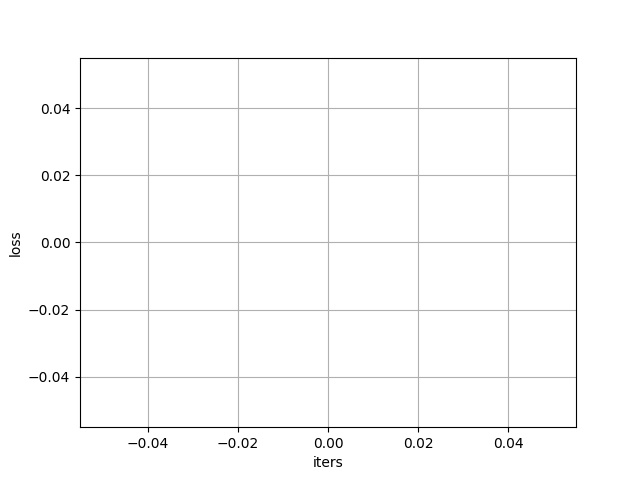

In [59]:
# this scripts generates loss_plot.jpg  -> show it
%matplotlib inline
from IPython.display import Image

Image('./loss_plot.jpg')

# Conclusion

<p align="justify">

</p>

#References

@misc{darknet13,
  author =   {Joseph Redmon},
  title =    {Darknet: Open Source Neural Networks in C},
  howpublished = {\url{http://pjreddie.com/darknet/}},
  year = {2013--2016}
}